#### 🧠 Business Problem
Telecom companies lose revenue when customers leave (churn). Retaining a customer is ~5x cheaper than acquiring a new one. Predicting churn allows proactive retention.

#### 💡 Solution
We trained a machine learning model to identify customers likely to churn using behavioral and demographic features. The model enables retention teams to offer discounts or loyalty rewards before customers leave.

#### 🎯 Business Value
- 📉 Reduced churn = increased lifetime value
- 📊 Targeted retention offers = cost savings
- 🤖 ML-driven insights = scalable churn prevention


In [66]:
import shap
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
df = pd.read_csv('Data/customer_churn_data.csv')
df.head(10)

CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2           63.79  Month-to-Month   
3           4   60  Female       8          102.34        One-Year   
4           5   42    Male      32           69.01  Month-to-Month   
5           6   42  Female      16          119.75        Two-Year   
6           7   60    Male      14           80.32        One-Year   
7           8   52  Female       6           58.90        One-Year   
8           9   40  Female      53           49.81        Two-Year   
9          10   50  Female      10           61.55  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic        353.40         Yes   Yes  
1     Fiber Optic          0.00         Yes   Yes  
2     Fiber Optic        127.58          No   Yes  
3             DSL        818.72         Yes   Yes  
4             NaN       2208.32          No   Yes  
5             DSL       1916.00         Yes   Yes  
6             NaN       1124.48          No   Yes  
7             NaN        353.40          No   Yes  
8     Fiber Optic       2639.93         Yes    No  
9     Fiber Optic        615.50         Yes   Yes

In [69]:
# Fill missing values
df["InternetService"] = df["InternetService"].fillna

In [70]:
# Checking for class imbalance
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [71]:
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]
y = df[["Churn"]]

In [72]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0) # 0 for Male & 1 for Female

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [76]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)


🔍 SHAP for Logistic Regression


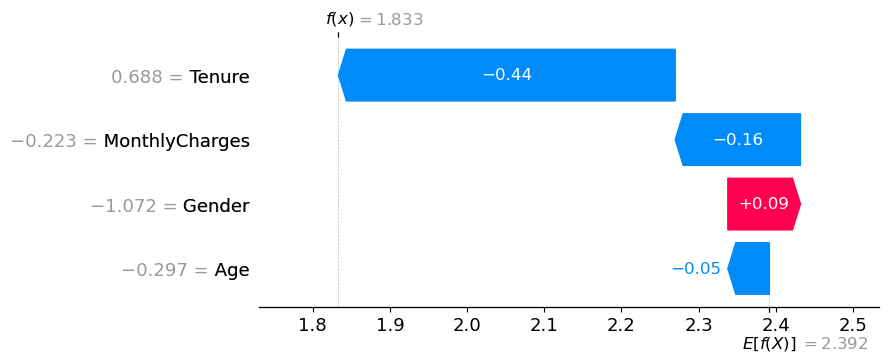


🔍 SHAP for KNN


100%|██████████| 1/1 [00:00<?, ?it/s]


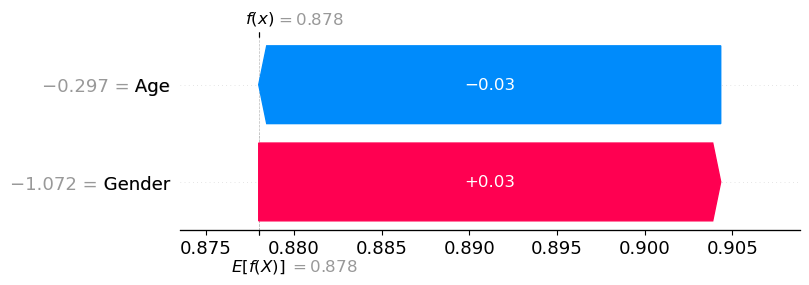


🔍 SHAP for SVC


100%|██████████| 1/1 [00:00<00:00, 22.22it/s]


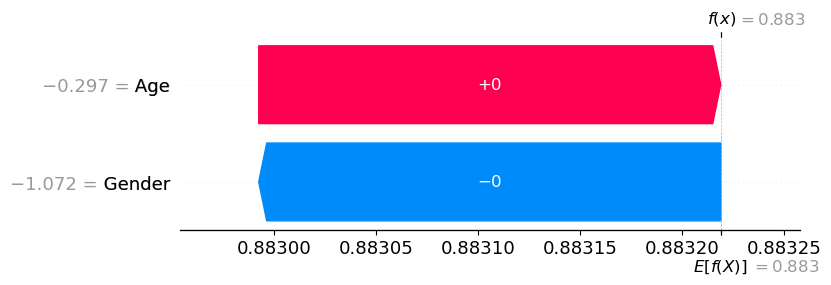


🔍 SHAP for Decision Tree


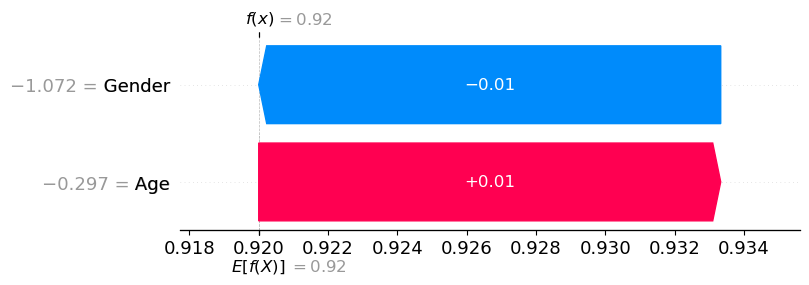


🔍 SHAP for Random Forest


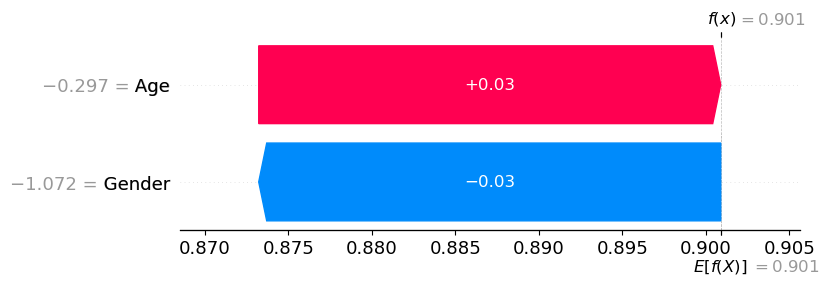

In [80]:
feature_names = ['Age', 'Gender', 'Tenure', 'MonthlyCharges']

X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_instance_df = pd.DataFrame(X_test_scaled[0:1], columns=feature_names)

for name, model in models.items():
    print(f"\n🔍 SHAP for {name}")
    
    if name in ['Decision Tree', 'Random Forest']:
        explainer = shap.Explainer(model, X_train_df)
    elif name == 'Logistic Regression':
        explainer = shap.Explainer(model, X_train_df)
    else:  # KNN, SVC
        explainer = shap.KernelExplainer(model.predict_proba, X_train_df[:100])

    shap_values = explainer(X_instance_df)

    class_idx = 1  # "Churn"

    if shap_values.values.ndim == 3:
        explanation = shap.Explanation(
            values=shap_values.values[0, class_idx],
            base_values=shap_values.base_values[0, class_idx],
            data=shap_values.data[0],
            feature_names=shap_values.feature_names
        )
    else:
        explanation = shap_values[0]

    shap.plots.waterfall(explanation, max_display=4, show=True)


In [83]:
from lime.lime_tabular import LimeTabularExplainer

feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
class_names = ['No Churn', 'Churn']

explainer = LimeTabularExplainer(X_train_scaled, feature_names=feature_names, class_names=class_names, mode='classification')

for name, model in models.items():
    print(f"Model: {name}")
    exp = explainer.explain_instance(X_test_scaled[0], model.predict_proba, num_features=4)
    exp.show_in_notebook()


Model: Logistic Regression


Model: KNN


Model: SVC


Model: Decision Tree


Model: Random Forest
